In [1]:
import sqlite3
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

# Reddit Database

The Reddit Database contains roughly 1 billion comments with information regarding the subreddit they were intitially posted in, the post author, and the parent post, as well as a host of other information regarding metadata like score and summary features.

In [2]:
# conn = sqlite3.connect('/volumes/Media/DataSets/2015_reddit_comments_corpus_sqlite/reddit_data.db')
# reddit = pd.read_sql_query('SELECT * FROM comment LIMIT 10000', conn)
# print(reddit.head())
# cursor.execute('SELECT COUNT(*) FROM comment') # Painfully slow to run; approx 1 billion rows

# Free Music Archive

[The Free Music Archive](https://github.com/mdeff/fma) contains metadata and 30 second clips of over 100,000 tracks.

## Tracks

In [3]:
# Tracks table
tracks = pd.read_csv('../data/raw/fma_metadata/tracks.csv',header=1)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(tracks.shape)

(106575, 53)


In [5]:
print(tracks.columns)

Index(['Unnamed: 0', 'comments', 'date_created', 'date_released', 'engineer',
       'favorites', 'id', 'information', 'listens', 'producer', 'tags',
       'title', 'tracks', 'type', 'active_year_begin', 'active_year_end',
       'associated_labels', 'bio', 'comments.1', 'date_created.1',
       'favorites.1', 'id.1', 'latitude', 'location', 'longitude', 'members',
       'name', 'related_projects', 'tags.1', 'website', 'wikipedia_page',
       'split', 'subset', 'bit_rate', 'comments.2', 'composer',
       'date_created.2', 'date_recorded', 'duration', 'favorites.2',
       'genre_top', 'genres', 'genres_all', 'information.1', 'interest',
       'language_code', 'license', 'listens.1', 'lyricist', 'number',
       'publisher', 'tags.2', 'title.1'],
      dtype='object')


In [6]:
print(tracks.head())

  Unnamed: 0  comments         date_created        date_released engineer  \
0   track_id       NaN                  NaN                  NaN      NaN   
1          2       0.0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
2          3       0.0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3          5       0.0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
4         10       0.0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   

   favorites   id information  listens producer  ... information.1 interest  \
0        NaN  NaN         NaN      NaN      NaN  ...           NaN      NaN   
1        4.0  1.0     <p></p>   6073.0      NaN  ...           NaN   4656.0   
2        4.0  1.0     <p></p>   6073.0      NaN  ...           NaN   1470.0   
3        4.0  1.0     <p></p>   6073.0      NaN  ...           NaN   1933.0   
4        4.0  6.0         NaN  47632.0      NaN  ...           NaN  54881.0   

   language_code                                            li

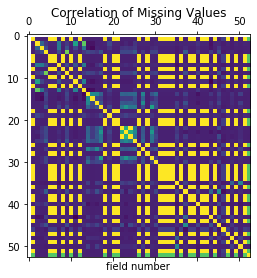

In [7]:
na_grid = tracks.applymap(pd.isna)
plt.matshow(na_grid.corr())
plt.xlabel('field number')
plt.title('Correlation of Missing Values')
plt.show()

In [8]:
row_na = na_grid.apply(sum, axis=1)

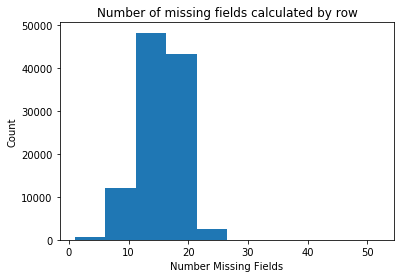

In [9]:
plt.hist(row_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by row')
plt.show()

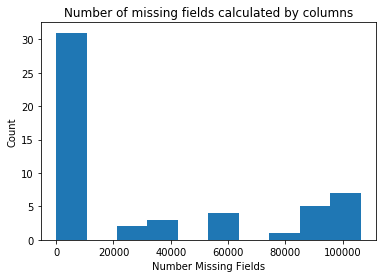

In [10]:
col_na = na_grid.apply(sum, axis=0)
plt.hist(col_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by columns')
plt.show()

In [11]:
# Define class to produce these plots reliably
class NaAnalysis:
    def __init__(self, df):
        self.na_grid = df.applymap(pd.isna)
        self.row_na = self.na_grid.apply(sum, axis=1)
        self.col_na = self.na_grid.apply(sum, axis=0)
    def corr_plot(self):
        # Correlation plot
        plt.matshow(self.na_grid.corr())
        plt.xlabel('field number')
        plt.title('Correlation of Missing Values')
        plt.show()
    def row_plot(self):
        # Row Histogram
        plt.hist(self.row_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by row')
        plt.show()
    def col_plot(self):
        # Col Histogram
        plt.hist(self.col_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by columns')
        plt.show()
    def run_analysis(self):
        self.corr_plot()
        self.row_plot()
        self.col_plot()

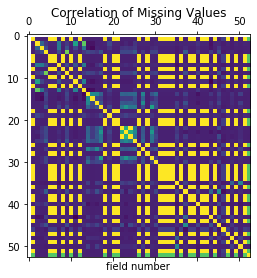

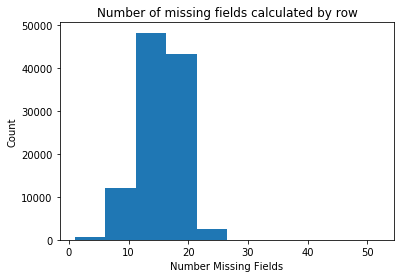

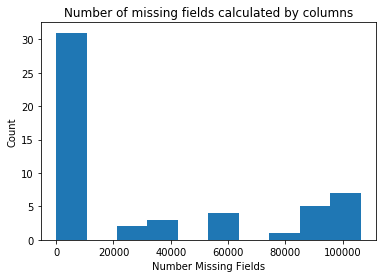

In [12]:
tracks_na = NaAnalysis(tracks)
tracks_na.run_analysis()

## Genres

In [13]:
# Genres Table
genres = pd.read_csv('~/Downloads/fma_metadata/genres.csv',header=0)

(163, 5)


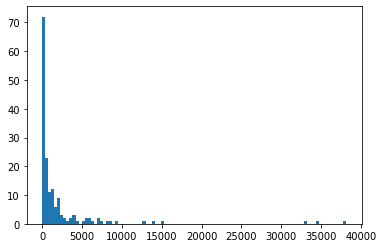

In [34]:
print(genres.shape)
plt.hist(genres['#tracks'], bins=100)
plt.show()

In [15]:
print(genres.columns)

Index(['genre_id', '#tracks', 'parent', 'title', 'top_level'], dtype='object')


In [37]:
print(genres.head(100))

    genre_id  #tracks  parent                   title  top_level
0          1     8693      38             Avant-Garde         38
1          2     5271       0           International          2
2          3     1752       0                   Blues          3
3          4     4126       0                    Jazz          4
4          5     4106       0               Classical          5
..       ...      ...     ...                     ...        ...
95       186      682      38            Sound Poetry         38
96       187      292       5  20th Century Classical          5
97       188      301      20                  Poetry         20
98       189       26      65              Talk Radio         20
99       214       40      92           North African          2

[100 rows x 5 columns]


/usr/local/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


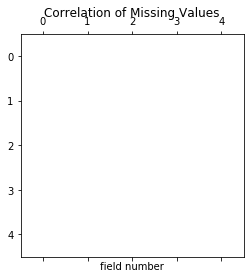

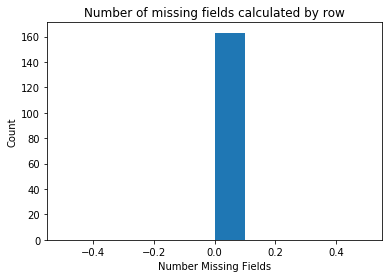

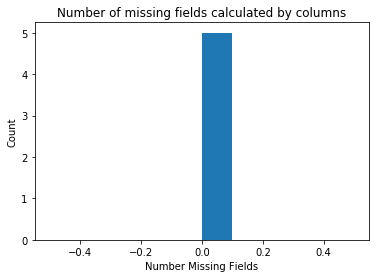

In [17]:
genres_na = NaAnalysis(genres)
genres_na.run_analysis()

## Features

In [12]:
# Features Table
features = pd.read_csv('../data/raw/fma_metadata/features.csv',header=2,nrows=1000)

In [19]:
print(features.shape)

(1000, 519)


In [20]:
print(list(features.columns))

['number', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01.1', '02.1', '03.1', '04.1', '05.1', '06.1', '07.1', '08.1', '09.1', '10.1', '11.1', '12.1', '01.2', '02.2', '03.2', '04.2', '05.2', '06.2', '07.2', '08.2', '09.2', '10.2', '11.2', '12.2', '01.3', '02.3', '03.3', '04.3', '05.3', '06.3', '07.3', '08.3', '09.3', '10.3', '11.3', '12.3', '01.4', '02.4', '03.4', '04.4', '05.4', '06.4', '07.4', '08.4', '09.4', '10.4', '11.4', '12.4', '01.5', '02.5', '03.5', '04.5', '05.5', '06.5', '07.5', '08.5', '09.5', '10.5', '11.5', '12.5', '01.6', '02.6', '03.6', '04.6', '05.6', '06.6', '07.6', '08.6', '09.6', '10.6', '11.6', '12.6', '01.7', '02.7', '03.7', '04.7', '05.7', '06.7', '07.7', '08.7', '09.7', '10.7', '11.7', '12.7', '01.8', '02.8', '03.8', '04.8', '05.8', '06.8', '07.8', '08.8', '09.8', '10.8', '11.8', '12.8', '01.9', '02.9', '03.9', '04.9', '05.9', '06.9', '07.9', '08.9', '09.9', '10.9', '11.9', '12.9', '01.10', '02.10', '03.10', '04.10', '05.10', '06.10',

In [21]:
print(features.head())

     number        01        02        03        04        05        06  \
0  track_id       NaN       NaN       NaN       NaN       NaN       NaN   
1         2  7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
2         3  1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
3         5  0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
4        10  3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   

         07        08        09  ...     04.41     05.41     06.41      01.70  \
0       NaN       NaN       NaN  ...       NaN       NaN       NaN        NaN   
1  1.481593  2.691455  0.866868  ...  0.054125  0.012226  0.012111   5.758890   
2  1.366848  1.054094  0.108103  ...  0.063831  0.014212  0.017740   2.824694   
3 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691  0.014759   6.808415   
4  1.770694  1.604566  0.521217  ...  0.074358  0.017952  0.013921  21.434212   

      01.71     01.72     01.73  01.74     01.75     01.76  
0

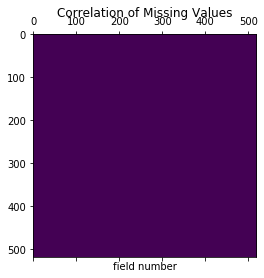

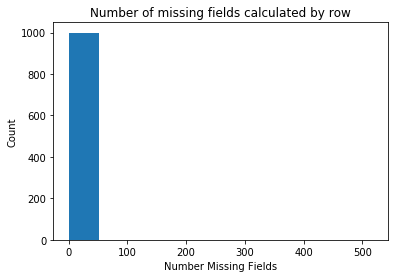

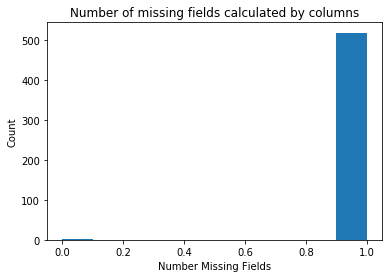

In [22]:
features_na = NaAnalysis(features)
features_na.run_analysis()

In [23]:
print(features_na.col_na.sort_values())

number    0
01.26     1
20.4      1
19.4      1
18.4      1
         ..
09.13     1
08.13     1
07.13     1
01.16     1
01.76     1
Length: 519, dtype: int64


## Echonest

In [13]:
# Echonest Table
echonest = pd.read_csv('../data/raw/fma_metadata/echonest.csv',header=2)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
print(echonest.shape)

(13130, 250)


In [26]:
print(list(echonest.columns))

['Unnamed: 0', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'album_date', 'album_name', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'release', 'artist_discovery_rank', 'artist_familiarity_rank', 'artist_hotttnesss_rank', 'song_currency_rank', 'song_hotttnesss_rank', 'artist_discovery', 'artist_familiarity', 'artist_hotttnesss', 'song_currency', 'song_hotttnesss', '000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '0

In [27]:
print(echonest.head())

  Unnamed: 0  acousticness  danceability    energy  instrumentalness  \
0   track_id           NaN           NaN       NaN               NaN   
1          2      0.416675      0.675894  0.634476          0.010628   
2          3      0.374408      0.528643  0.817461          0.001851   
3          5      0.043567      0.745566  0.701470          0.000697   
4         10      0.951670      0.658179  0.924525          0.965427   

   liveness  speechiness    tempo   valence  album_date  ...       214  \
0       NaN          NaN      NaN       NaN         NaN  ...       NaN   
1  0.177647     0.159310  165.922  0.576661         NaN  ... -1.992303   
2  0.105880     0.461818  126.957  0.269240         NaN  ... -1.582331   
3  0.373143     0.124595  100.260  0.621661         NaN  ... -2.288358   
4  0.115474     0.032985  111.562  0.963590  2008-03-11  ... -3.662988   

         215       216       217       218      219      220      221  \
0        NaN       NaN       NaN       NaN      N

In [28]:
echonest.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_latitude,artist_longitude,...,214,215,216,217,218,219,220,221,222,223
count,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,9770.000000,9770.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761,39.961892,-49.984040,...,-1.966002,10.745951,0.308984,0.255381,0.163876,0.068526,4.183428,4.114902,7.605432,138.932366
std,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028,15.554275,59.377974,...,1.708499,20.053146,0.140164,0.083731,3.484144,0.010930,4.967481,4.967004,6.444884,225.584951
min,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,-45.867100,-155.434000,...,-17.966162,-1.867880,0.129023,0.098280,0.000518,0.060000,0.322180,0.224580,-3.566834,-1.687834
25%,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321,37.784827,-87.632400,...,-2.587326,1.229409,0.242371,0.208750,0.021321,0.063080,1.817050,1.749660,2.866906,15.565598
50%,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743,40.781400,-74.007100,...,-1.565120,4.355214,0.286014,0.242745,0.042146,0.064490,3.094060,3.026260,5.502340,55.874954
75%,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575,47.254575,-0.127140,...,-0.875471,11.407599,0.339086,0.285305,0.087516,0.070070,5.147530,5.079770,10.597994,175.938553
max,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,68.927500,174.770000,...,1.663782,423.621094,5.211423,1.680570,375.744781,0.342000,226.326767,226.244080,67.041878,4790.696777


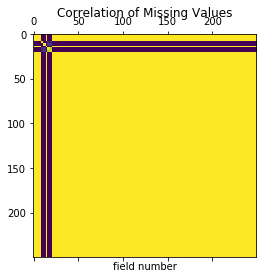

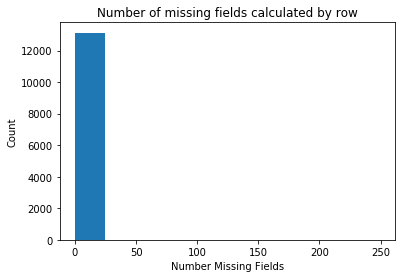

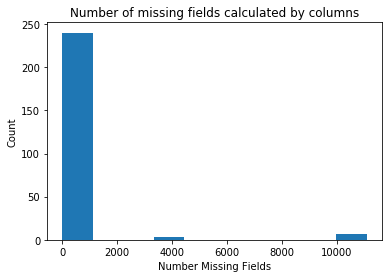

Unnamed: 0                     0
132                            1
133                            1
134                            1
135                            1
                           ...  
artist_familiarity_rank    10305
artist_hotttnesss_rank     10306
album_date                 10413
song_hotttnesss_rank       10924
song_currency_rank         11097
Length: 250, dtype: int64


In [29]:
echonest_na = NaAnalysis(echonest)
echonest_na.run_analysis()
print(echonest_na.col_na.sort_values())

# NBA Dataset

Contains information from basketball-reference.com across a number of different player metrics, by season and by game.

In [30]:
from glob import glob

files = glob('/Users/ryanswan/code/nbaScrape/data/*.csv')
nba_data = {}
for d in files:
    pd_data = pd.read_csv(d)
    nba_data[d] = pd_data
    print(d)
    print(pd_data.head())
    # n = NaAnalysis(pd_data)
    # n.run_analysis()
    

/Users/ryanswan/code/nbaScrape/data/div_all_salaries.csv
   Unnamed: 0                    Team   Lg      Salary Season player_id
0           0  Portland Trail Blazers  NBA  $1,058,640      P  jackja01
1           1  Portland Trail Blazers  NBA  $1,137,960      P  jackja01
2           2  Portland Trail Blazers  NBA  $1,217,400      P  jackja01
3           3          Indiana Pacers  NBA  $2,002,623      I  jackja01
4           4         Toronto Raptors  NBA  $4,500,000      T  jackja01
/Users/ryanswan/code/nbaScrape/data/div_per_minute.csv
   Unnamed: 0  Age   Tm   Lg Pos   G  GS    MP   FG   FGA  ...  TRB  AST  STL  \
0           0   22  POR  NBA  SG  79   4  1599  4.3   9.6  ...  3.6  4.9  0.9   
1           1   23  POR  NBA  PG  79  79  2651  4.3   9.6  ...  2.8  5.7  1.2   
2           2   24  POR  NBA  SG  82  16  2229  4.3  10.0  ...  3.8  5.1  1.0   
3           3   25  IND  NBA  SG  82  53  2716  5.1  11.3  ...  3.7  4.5  1.2   
4           4   26  TOR  NBA  PG  82  43  2243  5.2

[5 rows x 35 columns]
/Users/ryanswan/code/nbaScrape/data/div_playoffs_totals.csv
   Unnamed: 0  Age   Tm   Lg Pos   G  GS   MP  FG  FGA  ...  TRB  AST  STL  \
0           0   27  NOH  NBA  SG   6   0  111  12   34  ...   15   13    1   
1           1   29  GSW  NBA  SG  12   4  426  78  154  ...   53   56   11   
2           2   31  BRK  NBA  PG   6   0  153  28   54  ...   25   27    7   
3           0   31  HOU  NBA  PG   7   0   17   2    4  ...    4    2    0   
4           0   25  MIN  NBA  PG   4   0   27   2   10  ...    4    2    0   

   BLK  TOV  PF  PTS   Season  absYear  player_id  
0    1    8   4   35  2010-11     2010   jackja01  
1    4   38  26  206  2012-13     2012   jackja01  
2    1   20  14   74  2014-15     2014   jackja01  
3    0    2   2    5  2017-18     2017  jacksaa01  
4    0    1   3    4  1998-99     1998  jacksbo01  

[5 rows x 33 columns]
/Users/ryanswan/code/nbaScrape/data/div_advanced.csv
   Unnamed: 0  Age   Tm   Lg Pos   G    MP   PER    TS%   3PA